# Genesis Token Distribution

In [880]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


import re
import json


In [881]:
data = []

with open('data/data.json') as json_file:

    file = json.load(json_file)

    for line in file:
        output = {}

        output["name"] = line['name']
        output["Relay chain"] = line['relay_chain']
        output["Market supply"] = line['market_supply']
        output["Circulation supply"] = line['circulation_supply']
        output["Market cap"] = line['market_cap']

        for k in line["token_distribution"]:
            output[k[0]] = k[1]

        data.append(output)

df = pd.DataFrame(data)
df.fillna(0, inplace=True)

df.head(10)

,name,Relay chain,Market supply,Circulation supply,Market cap,tokenomics,Auction&Liquidity,EcosystemDev,FoundationReserver,Backers,...,AuctionIncentives,PCXHolders,CIDNFTMining,Council,Giveaway,Incubator&Advisor,Treasure&Reserves,Ecosystem&DevCommunity,ProtocolReserve,StrategicPartners&Advisors
0,Dora Factory,Kusama,0,0,0,0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Acala,Polkadot,1000000000,437461795,117083965,current,34.0,5.0,10.76,11.66,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Pichiu,Kusama,100000000,0,0,current,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bifrost Polkadot,Polkadot,80000000,12142000,2896360,current,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Genshiro,Kusama,1200000000,8164417,150000000125,current,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Equilibrium,Polkadot,1100000000917,0,0,current,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Bifrost Kusama,Kusama,80000000,12142000,2882463,current,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Nodle,Polkadot,850000000405,0,0,current,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Calamari Network,Kusama,10000000000,1596339367,4341913,current,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Bit.Country Pioneer,Kusama,1500000015,0,0,current,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [882]:
subcategories_df = df[['name', 'Relay chain','Market supply', 'Circulation supply', 'Market cap']].copy()

subcategories_df.head(10)

,name,Relay chain,Market supply,Circulation supply,Market cap
0,Dora Factory,Kusama,0,0,0
1,Acala,Polkadot,1000000000,437461795,117083965
2,Pichiu,Kusama,100000000,0,0
3,Bifrost Polkadot,Polkadot,80000000,12142000,2896360
4,Genshiro,Kusama,1200000000,8164417,150000000125
5,Equilibrium,Polkadot,1100000000917,0,0
6,Bifrost Kusama,Kusama,80000000,12142000,2882463
7,Nodle,Polkadot,850000000405,0,0
8,Calamari Network,Kusama,10000000000,1596339367,4341913
9,Bit.Country Pioneer,Kusama,1500000015,0,0


# Filter out the categories in the new categories list

In [883]:
categories = pd.read_csv('data/categories.csv')

print(categories)

                  Scraped Label   Category   Subcategory
0                  EcosystemDev    Budgets     Ecosystem
1            FoundationReserver    Reserve       Reserve
2                       Backers  Investors  Second Round
3                  FoundingTeam   Founders      Founders
4                  EarlyBackers  Investors    Seed Round
..                          ...        ...           ...
257                     Council   Founders      Founders
258                    Giveaway    Budgets     Ecosystem
259           Treasure&Reserves    Reserve       Reserve
260             ProtocolReserve    Reserve       Reserve
261  StrategicPartners&Advisors  Investors  Second Round

[262 rows x 3 columns]


In [884]:
categories["Subcategory"].unique()

array(['Ecosystem', 'Reserve', 'Second Round', 'Founders', 'Seed Round',
       'Crowdloan', 'Auctions', 'Community', 'Marketing', 'Liquidity',
       'Developers'], dtype=object)

In [885]:
for Subcategory in categories["Subcategory"].unique():
  subcategories_df[Subcategory] = 0

subcategories_df.head(10)

,name,Relay chain,Market supply,Circulation supply,Market cap,Ecosystem,Reserve,Second Round,Founders,Seed Round,Crowdloan,Auctions,Community,Marketing,Liquidity,Developers
0,Dora Factory,Kusama,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acala,Polkadot,1000000000,437461795,117083965,0,0,0,0,0,0,0,0,0,0,0
2,Pichiu,Kusama,100000000,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Bifrost Polkadot,Polkadot,80000000,12142000,2896360,0,0,0,0,0,0,0,0,0,0,0
4,Genshiro,Kusama,1200000000,8164417,150000000125,0,0,0,0,0,0,0,0,0,0,0
5,Equilibrium,Polkadot,1100000000917,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Bifrost Kusama,Kusama,80000000,12142000,2882463,0,0,0,0,0,0,0,0,0,0,0
7,Nodle,Polkadot,850000000405,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Calamari Network,Kusama,10000000000,1596339367,4341913,0,0,0,0,0,0,0,0,0,0,0
9,Bit.Country Pioneer,Kusama,1500000015,0,0,0,0,0,0,0,0,0,0,0,0,0


In [886]:
# Populate the dataframe with the respective values
for index, row  in categories.iterrows():

  subcategories_df[row["Subcategory"]] += df[row["Scraped Label"]]


subcategories_df.head(10)

,name,Relay chain,Market supply,Circulation supply,Market cap,Ecosystem,Reserve,Second Round,Founders,Seed Round,Crowdloan,Auctions,Community,Marketing,Liquidity,Developers
0,Dora Factory,Kusama,0,0,0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1,Acala,Polkadot,1000000000,437461795,117083965,5.0,10.76,11.66,20.25,18.33,0.0,0.0,0.0,0.0,0.0,0.0
2,Pichiu,Kusama,100000000,0,0,0.0,0.00,0.00,0.00,0.00,30.0,10.0,20.0,20.0,10.0,10.0
3,Bifrost Polkadot,Polkadot,80000000,12142000,2896360,34.5,10.00,5.00,20.00,10.00,17.5,0.0,0.0,3.0,0.0,0.0
4,Genshiro,Kusama,1200000000,8164417,150000000125,0.0,15.00,0.00,0.00,0.00,20.0,0.0,50.0,0.0,15.0,0.0
5,Equilibrium,Polkadot,1100000000917,0,0,0.0,35.00,0.00,15.00,5.00,10.0,0.0,25.0,0.0,10.0,0.0
6,Bifrost Kusama,Kusama,80000000,12142000,2882463,32.0,10.00,0.00,20.00,15.00,20.0,0.0,0.0,3.0,0.0,0.0
7,Nodle,Polkadot,850000000405,0,0,60.0,12.00,12.00,10.00,4.50,0.0,0.0,0.0,0.0,0.0,1.5
8,Calamari Network,Kusama,10000000000,1596339367,4341913,0.0,0.00,0.00,0.00,0.00,0.0,40.0,20.0,5.0,20.0,15.0
9,Bit.Country Pioneer,Kusama,1500000015,0,0,5.0,27.00,15.49,20.00,17.51,15.0,0.0,0.0,0.0,0.0,0.0


# Populating the special categories

In [887]:
# Auction&Liquidity
subcategories_df["Auctions"] += df["Auction&Liquidity"]/2

subcategories_df["Liquidity"] += df["Auction&Liquidity"]/2

# ParachainandEcosystem
subcategories_df["Crowdloan"] += df["ParachainandEcosystem"]/2

subcategories_df["Ecosystem"] += df["ParachainandEcosystem"]/2

# Marketing,Ecosystem&Partnerships
subcategories_df["Marketing"] += df["Marketing,Ecosystem&Partnerships"]/2

subcategories_df["Ecosystem"] += df["Marketing,Ecosystem&Partnerships"]/2

# Development&Marketing
subcategories_df["Developers"] += df["Development&Marketing"]/2

subcategories_df["Marketing"] += df["Development&Marketing"]/2

# MarketingAndEcosystem
subcategories_df["Marketing"] += df["MarketingAndEcosystem"]/2

subcategories_df["Ecosystem"] += df["MarketingAndEcosystem"]/2

# EcosystemandCommunity
subcategories_df["Ecosystem"] += df["EcosystemandCommunity"]/2

subcategories_df["Community"] += df["MarketingAndEcosystem"]/2

# Incubator&Advisor
subcategories_df["Seed Round"] += df["Incubator&Advisor"]/2

subcategories_df["Founders"] += df["Incubator&Advisor"]/2

# Ecosystem&DevCommunity
subcategories_df["Ecosystem"] += df["Ecosystem&DevCommunity"]/2

subcategories_df["Community"] += df["Ecosystem&DevCommunity"]/2


subcategories_df.head(10)

,name,Relay chain,Market supply,Circulation supply,Market cap,Ecosystem,Reserve,Second Round,Founders,Seed Round,Crowdloan,Auctions,Community,Marketing,Liquidity,Developers
0,Dora Factory,Kusama,0,0,0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1,Acala,Polkadot,1000000000,437461795,117083965,5.0,10.76,11.66,20.25,18.33,0.0,17.0,0.0,0.0,17.0,0.0
2,Pichiu,Kusama,100000000,0,0,0.0,0.00,0.00,0.00,0.00,30.0,10.0,20.0,20.0,10.0,10.0
3,Bifrost Polkadot,Polkadot,80000000,12142000,2896360,34.5,10.00,5.00,20.00,10.00,17.5,0.0,0.0,3.0,0.0,0.0
4,Genshiro,Kusama,1200000000,8164417,150000000125,0.0,15.00,0.00,0.00,0.00,20.0,0.0,50.0,0.0,15.0,0.0
5,Equilibrium,Polkadot,1100000000917,0,0,0.0,35.00,0.00,15.00,5.00,10.0,0.0,25.0,0.0,10.0,0.0
6,Bifrost Kusama,Kusama,80000000,12142000,2882463,32.0,10.00,0.00,20.00,15.00,20.0,0.0,0.0,3.0,0.0,0.0
7,Nodle,Polkadot,850000000405,0,0,60.0,12.00,12.00,10.00,4.50,0.0,0.0,0.0,0.0,0.0,1.5
8,Calamari Network,Kusama,10000000000,1596339367,4341913,0.0,0.00,0.00,0.00,0.00,0.0,40.0,20.0,5.0,20.0,15.0
9,Bit.Country Pioneer,Kusama,1500000015,0,0,5.0,27.00,15.49,20.00,17.51,15.0,0.0,0.0,0.0,0.0,0.0


# Data Analysis

In [888]:
categorized_df = df[['name', 'Relay chain','Market supply', 'Circulation supply', 'Market cap']].copy()

for cat in categories["Category"].unique():
  categorized_df[cat] = 0

categorized_df.head(10)

,name,Relay chain,Market supply,Circulation supply,Market cap,Budgets,Reserve,Investors,Founders,Parachain,Liquidity
0,Dora Factory,Kusama,0,0,0,0,0,0,0,0,0
1,Acala,Polkadot,1000000000,437461795,117083965,0,0,0,0,0,0
2,Pichiu,Kusama,100000000,0,0,0,0,0,0,0,0
3,Bifrost Polkadot,Polkadot,80000000,12142000,2896360,0,0,0,0,0,0
4,Genshiro,Kusama,1200000000,8164417,150000000125,0,0,0,0,0,0
5,Equilibrium,Polkadot,1100000000917,0,0,0,0,0,0,0,0
6,Bifrost Kusama,Kusama,80000000,12142000,2882463,0,0,0,0,0,0
7,Nodle,Polkadot,850000000405,0,0,0,0,0,0,0,0
8,Calamari Network,Kusama,10000000000,1596339367,4341913,0,0,0,0,0,0
9,Bit.Country Pioneer,Kusama,1500000015,0,0,0,0,0,0,0,0


In [889]:
categories[ categories["Category"] == "Budgets"]["Subcategory"].unique()

array(['Ecosystem', 'Community', 'Marketing', 'Developers'], dtype=object)

In [890]:
for cat in categories["Category"].unique():
  for subcat in categories[ categories["Category"] == cat]["Subcategory"].unique():
    categorized_df[cat] += subcategories_df[subcat]

categorized_df

,name,Relay chain,Market supply,Circulation supply,Market cap,Budgets,Reserve,Investors,Founders,Parachain,Liquidity
0,Dora Factory,Kusama,0,0,0,0.0,0.00,0.00,0.00,0.0,0.0
1,Acala,Polkadot,1000000000,437461795,117083965,5.0,10.76,29.99,20.25,17.0,17.0
2,Pichiu,Kusama,100000000,0,0,50.0,0.00,0.00,0.00,40.0,10.0
3,Bifrost Polkadot,Polkadot,80000000,12142000,2896360,37.5,10.00,15.00,20.00,17.5,0.0
4,Genshiro,Kusama,1200000000,8164417,150000000125,50.0,15.00,0.00,0.00,20.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...
159,Hazel,Polkadot,0,0,0,0.0,0.00,0.00,0.00,0.0,0.0
160,Pulse Network,Polkadot,0,0,0,0.0,0.00,0.00,0.00,0.0,0.0
161,Wiv,Polkadot,0,0,0,0.0,0.00,0.00,0.00,0.0,0.0
162,Polimec,Polkadot,0,0,0,0.0,0.00,0.00,0.00,0.0,0.0


# By category

In [891]:
categorized_token_df = categorized_df
for cat in categories["Category"].unique():
  categorized_token_df[cat] *=  categorized_token_df["Market cap"].astype(int)/100
  categorized_token_df[cat] = categorized_token_df[cat].astype(int)

categorized_token_df

,name,Relay chain,Market supply,Circulation supply,Market cap,Budgets,Reserve,Investors,Founders,Parachain,Liquidity
0,Dora Factory,Kusama,0,0,0,0,0,0,0,0,0
1,Acala,Polkadot,1000000000,437461795,117083965,5854198,12598234,35113481,23709502,19904274,19904274
2,Pichiu,Kusama,100000000,0,0,0,0,0,0,0,0
3,Bifrost Polkadot,Polkadot,80000000,12142000,2896360,1086135,289636,434454,579272,506863,0
4,Genshiro,Kusama,1200000000,8164417,150000000125,75000000062,22500000018,0,0,30000000025,22500000018
...,...,...,...,...,...,...,...,...,...,...,...
159,Hazel,Polkadot,0,0,0,0,0,0,0,0,0
160,Pulse Network,Polkadot,0,0,0,0,0,0,0,0,0
161,Wiv,Polkadot,0,0,0,0,0,0,0,0,0
162,Polimec,Polkadot,0,0,0,0,0,0,0,0,0


# By subcategory

In [892]:
subcategories_token_df = subcategories_df
for cat in categories["Subcategory"].unique():
  subcategories_token_df[cat] *=  subcategories_token_df["Market cap"].astype(int)/100
  subcategories_token_df[cat] = subcategories_token_df[cat].astype(int)

subcategories_token_df

,name,Relay chain,Market supply,Circulation supply,Market cap,Ecosystem,Reserve,Second Round,Founders,Seed Round,Crowdloan,Auctions,Community,Marketing,Liquidity,Developers
0,Dora Factory,Kusama,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acala,Polkadot,1000000000,437461795,117083965,5854198,12598234,13651990,23709502,21461490,0,19904274,0,0,19904274,0
2,Pichiu,Kusama,100000000,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Bifrost Polkadot,Polkadot,80000000,12142000,2896360,999244,289636,144818,579272,289636,506863,0,0,86890,0,0
4,Genshiro,Kusama,1200000000,8164417,150000000125,0,22500000018,0,0,0,30000000025,0,75000000062,0,22500000018,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,Hazel,Polkadot,0,0,0,0,0,0,0,0,0,0,0,0,0,0
160,Pulse Network,Polkadot,0,0,0,0,0,0,0,0,0,0,0,0,0,0
161,Wiv,Polkadot,0,0,0,0,0,0,0,0,0,0,0,0,0,0
162,Polimec,Polkadot,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# By Relay chain

In [893]:
subcategories_token_kusama_df = subcategories_token_df[subcategories_token_df["Relay chain"] == "Kusama"]
subcategories_token_polkadot_df = subcategories_token_df[subcategories_token_df["Relay chain"] == "Polkadot"]

categorized_token_kusama_df = categorized_token_df[categorized_token_df["Relay chain"] == "Kusama"]
categorized_token_polkadot_df = categorized_token_df[categorized_token_df["Relay chain"] == "Polkadot"]

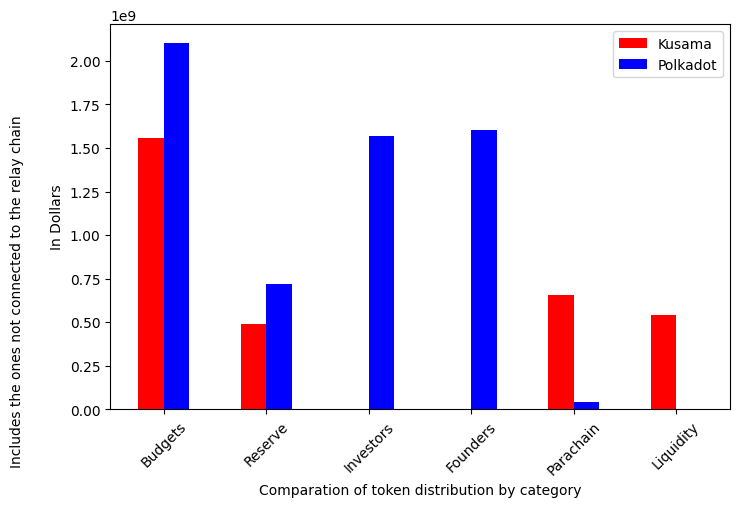

In [894]:
labels = categories["Category"].unique()
width = 0.25
x_vals = np.arange(len(labels))

plt.figure(figsize=(8,5))  

plt.bar(x_vals - width/2, categorized_token_kusama_df.mean(numeric_only=True), color = 'r', width = width,  label='Kusama')
plt.bar(x_vals + width/2, categorized_token_polkadot_df.mean(numeric_only=True), color = 'b', width = width,  label='Polkadot')

plt.xticks( x_vals , labels, rotation=45 )
plt.xlabel('Comparation of token distribution by category')
plt.ylabel('In Dollars')
plt.figtext(0, 0, "Includes the ones not connected to the relay chain", rotation = 90)
plt.legend()

plt.show()

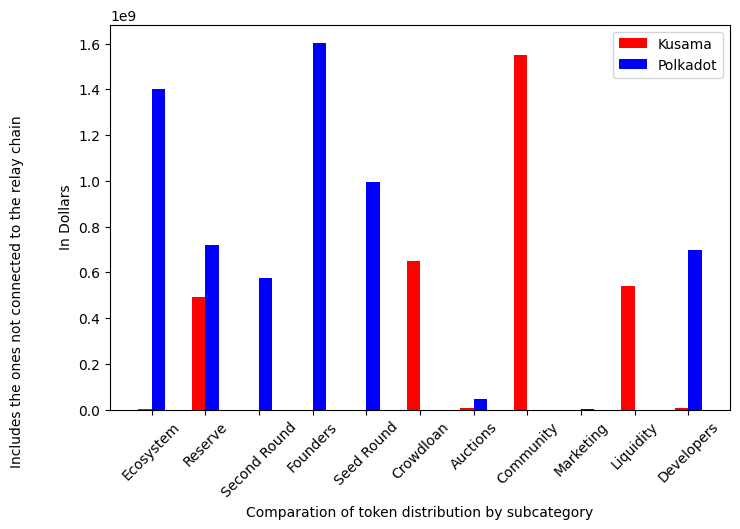

In [895]:
labels = categories["Subcategory"].unique()
width = 0.25
x_vals = np.arange(len(labels))

plt.figure(figsize=(8,5))  

plt.bar(x_vals - width/2, subcategories_token_kusama_df.mean(numeric_only=True), color = 'r', width = width,  label='Kusama')
plt.bar(x_vals + width/2, subcategories_token_polkadot_df.mean(numeric_only=True), color = 'b', width = width,  label='Polkadot')

plt.xticks( x_vals , labels, rotation=45 )
plt.xlabel('Comparation of token distribution by subcategory')
plt.ylabel('In Dollars')
plt.figtext(0, 0, "Includes the ones not connected to the relay chain", rotation = 90)
plt.legend()

plt.show()

# By Chain